In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

In [2]:
df=pd.read_csv(r'C:\Users\ramya\Downloads\archive (9)\Smart_City_index_headers.csv')

In [3]:
df

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


In [5]:
df.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [6]:
df.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [7]:
df.describe()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,29.588849,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,1.000000,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,26.250000,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,51.500000,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,76.750000,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,102.000000,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


In [8]:
print(f"Records : {df.shape[0]}\nFeatures : {df.shape[1]}")

Records : 102
Features : 11


In [9]:
null = pd.DataFrame({"Percentage ":df.isna().sum() / len(df) * 100})
null.style.background_gradient(cmap='coolwarm')

,Percentage
Id,0.000000
City,0.000000
Country,0.000000
Smart_Mobility,0.000000
Smart_Environment,0.000000
Smart_Government,0.000000
Smart_Economy,0.000000
Smart_People,0.000000
Smart_Living,0.000000
SmartCity_Index,0.000000


In [10]:
categorical_features = list(df.select_dtypes(include='object').columns)
numerical_features = list(df.select_dtypes(exclude='object').columns)

In [11]:
Label_Encoder = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = Label_Encoder.fit_transform(df[i].astype(str))

In [13]:
df

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,65,22,6480,6512,7516,4565,8618,9090,7138,666
1,2,11,22,7097,6876,7350,4905,8050,9090,7296,823
2,3,4,20,7540,5558,8528,8095,7098,7280,7311,839
3,4,24,6,7490,7920,8726,5580,5780,7200,7171,698
4,5,82,30,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,74,17,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,10,4,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,80,24,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,20,3,6675,4052,5946,8022,6424,8657,6678,206


In [14]:
df['SmartCity_Index']=pd.to_datetime(df['SmartCity_Index'])
df_new=df.set_index('SmartCity_Index')
df_new.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index_relative_Edmonton
SmartCity_Index,,,,,,,,,,
1970-01-01 00:00:00.000007138,1,65,22,6480,6512,7516,4565,8618,9090,666
1970-01-01 00:00:00.000007296,2,11,22,7097,6876,7350,4905,8050,9090,823
1970-01-01 00:00:00.000007311,3,4,20,7540,5558,8528,8095,7098,7280,839
1970-01-01 00:00:00.000007171,4,24,6,7490,7920,8726,5580,5780,7200,698
1970-01-01 00:00:00.000006812,5,82,30,6122,7692,8354,4330,6743,7730,340


In [15]:
df_new.tail()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index_relative_Edmonton
SmartCity_Index,,,,,,,,,,
1970-01-01 00:00:00.000004712,98,74,17,4152,4584,4616,7380,3745,4330,-1760
1970-01-01 00:00:00.000004449,99,10,4,7610,2998,2806,4905,5183,1980,-2023
1970-01-01 00:00:00.000004191,100,80,24,4588,2908,3622,4515,5390,4100,-2281
1970-01-01 00:00:00.000006678,101,20,3,6675,4052,5946,8022,6424,8657,206
1970-01-01 00:00:00.000006472,102,29,3,5801,4499,6396,8022,6200,8141,0


In [16]:
sum=df.groupby(df['Smart_People']).count()['Id'].iloc[0]+df.groupby(df['Smart_People']).count()['Id'].iloc[1]

In [17]:
d1=df_new.groupby(df_new.index).mean()
d2=df_new.groupby([df_new.index,"Smart_People"]).mean()

<AxesSubplot:xlabel='SmartCity_Index'>

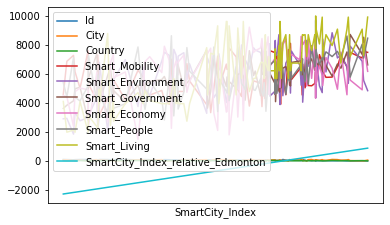

In [18]:
d1.plot()

In [19]:
pd.value_counts(df['Smart_People'])

6703    2
6955    2
4385    2
4590    2
6363    1
       ..
5818    1
4723    1
5650    1
4660    1
6200    1
Name: Smart_People, Length: 98, dtype: int64

In [21]:
d1
df1= minmax_scale(d1)
scaler = StandardScaler()
dmain = scaler.fit_transform(d1)
print(df1,dmain)

[[0.98019802 0.79207921 0.68571429 0.28632219 0.15127252 0.13783784
  0.39107951 0.37336245 0.26433915 0.        ]
 [0.91089109 0.77227723 0.11428571 0.74873354 0.15527595 0.175
  0.3800905  0.23260553 0.         0.01170516]
 [0.73267327 0.25742574 0.94285714 0.83181358 0.         0.22567568
  0.11700065 0.62590975 0.01870324 0.03353369]
 [0.85148515 0.38613861 0.11428571 0.60141844 0.21303975 0.36790541
  0.42533937 0.22707424 0.         0.03827903]
 [0.95049505 0.56435644 0.68571429 0.37284701 0.13182728 0.38378378
  0.45765999 0.19184862 0.26433915 0.05472952]
 [0.97029703 0.0990099  0.11428571 0.89868288 0.16414069 0.
  0.44149968 0.34323144 0.         0.08161974]
 [0.79207921 0.18811881 0.31428571 0.43323202 0.18472977 0.49425676
  0.11893988 0.64556041 0.14214464 0.08288516]
 [0.84158416 0.88118812 0.4        0.19959473 0.35802116 0.775
  0.59857789 0.1874818  0.04738155 0.11009174]
 [0.68316832 0.01980198 0.94285714 0.83627153 0.03688876 0.53074324
  0.23723335 0.45240175 0.0187

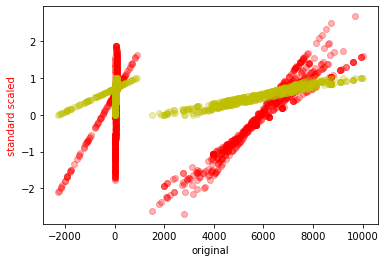

In [25]:
plt.scatter(d1, dmain, alpha=0.3,c='r')
plt.scatter(d1, df1, alpha=0.3,c='y')
plt.ylabel("scaled",c='r')
plt.xlabel("original");

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=y, order=(1,1,3))
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -763.377
Date:                Sun, 16 Apr 2023   AIC                           1536.754
Time:                        21:37:56   BIC                           1549.830
Sample:                             0   HQIC                          1542.048
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8257      0.185      4.470      0.000       0.464       1.188
ma.L1         -1.6384      0.185     -8.837      0.000      -2.002      -1.275
ma.L2          0.5819      0.236      2.467      0.014       0.120       1.044
ma.L3          0.1248      0.130      0.962      0.336      -0.129       0.379
sigma2       2.12e+05   1.83e+04     11.588      0.000    1.76e+05    2.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               157.32
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

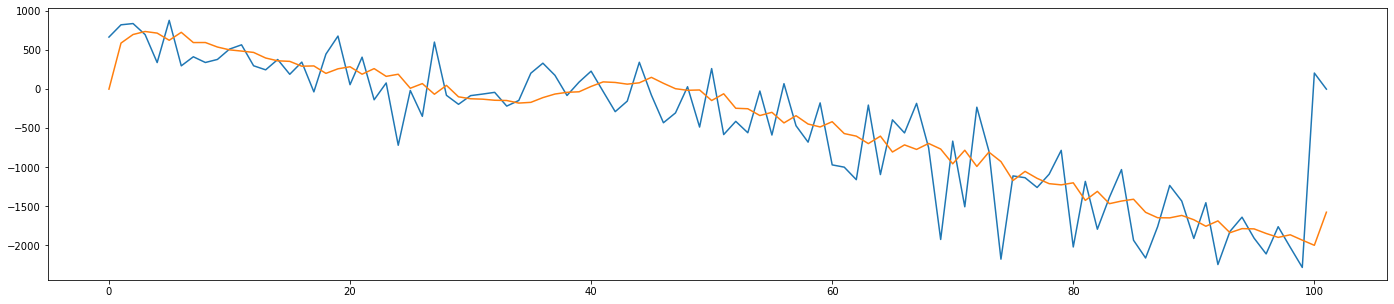

In [59]:
plt.figure(figsize=(24,5))
plt.plot(y)
plt.plot(model.predict())
plt.show()

In [53]:
est = sm.OLS(y, x.astype(float)).fit()

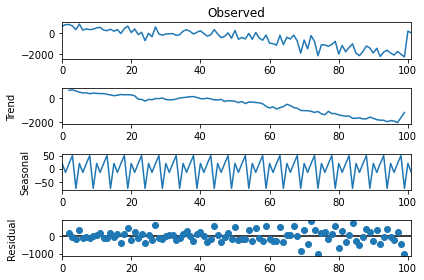

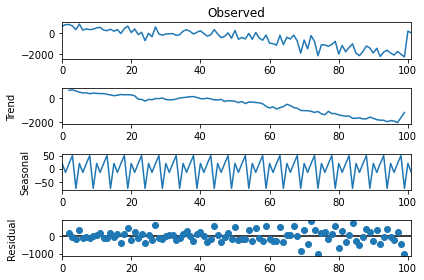

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive', period=5)
result.plot()

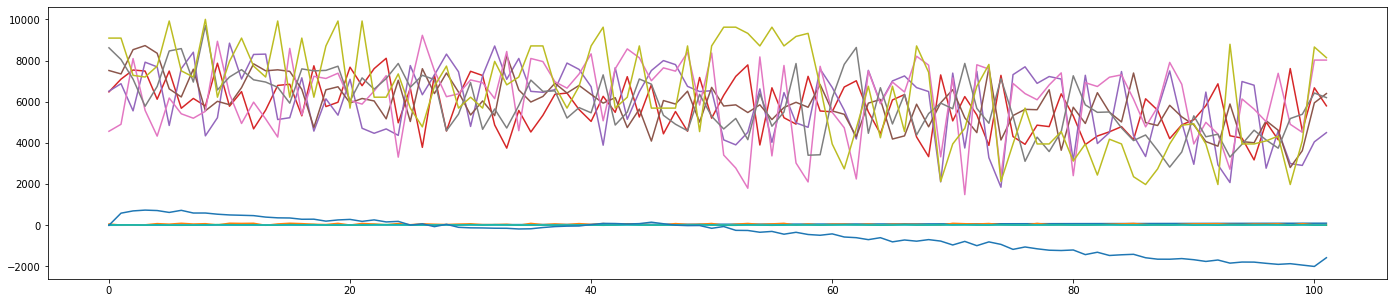

In [29]:
plt.figure(figsize=(24,5))
plt.plot(x)
plt.plot(model.predict())
plt.show()

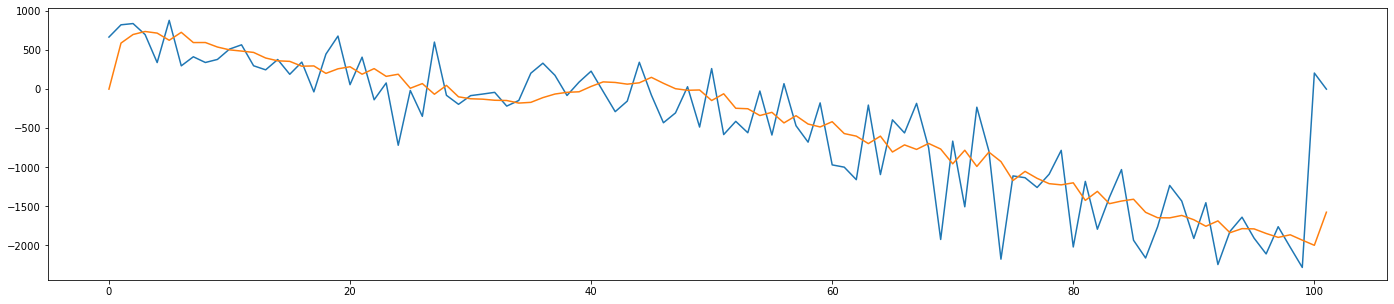

In [30]:
plt.figure(figsize=(24,5))
plt.plot(y)
plt.plot(model.predict())
plt.show()